In [ ]:
!pip install pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.1 MB/s eta 0:00:00


In [ ]:
from pysr import PySRRegressor

[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.2 to /root/.julia/environments/pyjuliapkg/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.11/julia-1.11.2-linux-x86_64.tar.gz
             download complete
[juliapkg] Verifying download


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from torch.optim import LBFGS
import math
import sympy

In [ ]:
import torch
import numpy as np
import random

# Set the random seed for reproducibility
random.seed(42)  # For Python's built-in random module
np.random.seed(42)  # For NumPy
torch.manual_seed(42)  # For PyTorch (CPU)
torch.cuda.manual_seed_all(42)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.linalg

# # Define constants
# NUM_SUBJECTS = 76
# NUM_GROUPS = 4
# NUM_NODES = 83
# GROUP_SIZE = NUM_SUBJECTS // NUM_GROUPS
# TIME_STEP = 1  # Smaller time step
# TIME_POINTS = 20  # Simulating from 0 to 10 years

# # Reaction terms with saturation
# def reaction_term_1(c, max_tau=1):
#     return c * (1 - c)

# def reaction_term_2(c, max_tau=0.6495190):
#     return max_tau*c * (1 - (c)**2)

# def reaction_term_3(c, max_tau=0.529133684):
#     return max_tau*c * (1 - (c)**3)

# def reaction_term_4(c, max_tau=1):
#     return 1.059016994*c * (1 - c) * np.exp(c - 1.381966011)

# reaction_terms = [reaction_term_1, reaction_term_2, reaction_term_3, reaction_term_4]

# # Sample from given distributions for parameters
# def sample_parameters(num_subjects, num_nodes):
#     kappa = np.random.normal(1, 0.52, num_subjects)#76 value
#     alpha_i = np.random.normal(0.6, 0.12, num_subjects) #76 value
#     alpha_ij = np.array([np.random.normal(ai, 0.22, num_nodes) for ai in alpha_i])#83*76 values
#     return kappa, alpha_i, alpha_ij

# # Generate initial tau concentrations using log-normal distribution
# real_data_mean = 0.1  # Mean tau concentration in mol/m^3
# real_data_std = 0.05  # Standard deviation
# def generate_initial_conditions_log_normal(num_subjects, num_nodes):
#     return np.random.lognormal(mean=np.log(real_data_mean), sigma=np.log(1 + real_data_std / real_data_mean), size=(num_subjects, num_nodes))

# # Set higher tau concentrations in specific "seed" nodes
# # def set_high_tau_nodes(initial_conditions, high_tau_value=1e-3, nodes=[0, 1, 2]):
# #     for subj in range(initial_conditions.shape[0]):
# #         initial_conditions[subj, nodes] = high_tau_value
# #     return initial_conditions

# # Generate a realistic connectivity matrix (Laplacian)
# def generate_connectivity_matrix(num_nodes):
#     A = np.random.rand(num_nodes, num_nodes)
#     A = (A + A.T) / 2  # Make symmetric
#     np.fill_diagonal(A, 0)  # No self-loops
#     D = np.diag(A.sum(axis=1))  # Degree matrix
#     L = D - A  # Graph Laplacian
#     # Normalize Laplacian
#     max_eigenvalue = np.max(np.linalg.eigvalsh(L))
#     return L / max_eigenvalue

# # Simulate tau concentration dynamics over time

# L = generate_connectivity_matrix(NUM_NODES)  # Generate realistic brain connectivity
# print(L.shape)
# kappa, alpha_i, alpha_ij = sample_parameters(NUM_SUBJECTS, NUM_NODES)  # Sample parameters #k is (76,) ,#alpha_ij is (76,83) matrix
# print(alpha_ij.shape)
# def simulate_tau_dynamics(initial_conditions, kappa, alpha_ij, reaction_terms, L, time_step, time_points):
#     num_subjects, num_nodes = initial_conditions.shape
#     c = np.zeros((num_subjects, num_nodes, time_points))
#     c[:, :, 0] = initial_conditions

#     for t in range(1, time_points):
#         for subj in range(num_subjects):
#             group = subj // GROUP_SIZE
#             f = reaction_terms[group]
#             for i in range(num_nodes):
#                 diffusion = -kappa[subj] * np.dot(L[i, :], c[subj, :, t-1])
#                 reaction = alpha_ij[subj, i] * f(c[subj, i, t-1])
#                 c[subj, i, t] = c[subj, i, t-1] + time_step * (diffusion + reaction)
#                 c[subj, i, t] = max(0, c[subj, i, t])
#     return c

# # Main workflow
# initial_conditions = generate_initial_conditions_log_normal(NUM_SUBJECTS, NUM_NODES)
# print(initial_conditions[0,:].shape)
# tau_concentration = simulate_tau_dynamics(initial_conditions, kappa, alpha_ij, reaction_terms, L, TIME_STEP, TIME_POINTS)
# # print(tau_concentration.shape)
# # Plot example dynamics for a single node
# plt.figure(figsize=(10, 6))
# for group in range(NUM_GROUPS):
#     plt.plot(np.arange(0, 20, TIME_STEP), tau_concentration[group * GROUP_SIZE, 0, :], label=f"Group {group + 1}")
# plt.xlabel("Time (years)")
# plt.ylabel("Tau Concentration (mol/m^3)")
# plt.title("Tau Concentration Over Time for a Single Node (Seed Node Example)")
# plt.legend()
# plt.show()

# # Optionally, plot tau dynamics for all nodes of a single patient
# single_patient_idx = 0  # You can select any patient here
# plt.figure(figsize=(12, 8))
# for i in range(NUM_NODES):
#     plt.plot(np.arange(0, 20, TIME_STEP), tau_concentration[single_patient_idx, i, :], label=f"Node {i}")
# plt.xlabel("Time (years)")
# plt.ylabel("Tau Concentration (mol/m^3)")
# plt.title(f"Tau Concentration Dynamics for All Nodes (Patient {single_patient_idx + 1})")
# plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1))
# plt.tight_layout()
# plt.show()


<ipython-input-8-b4fe28c4a893>:73: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  c[subj, :, :] = odeint(tau_dynamics, c_flat_initial, t, args=(subj, group)).T


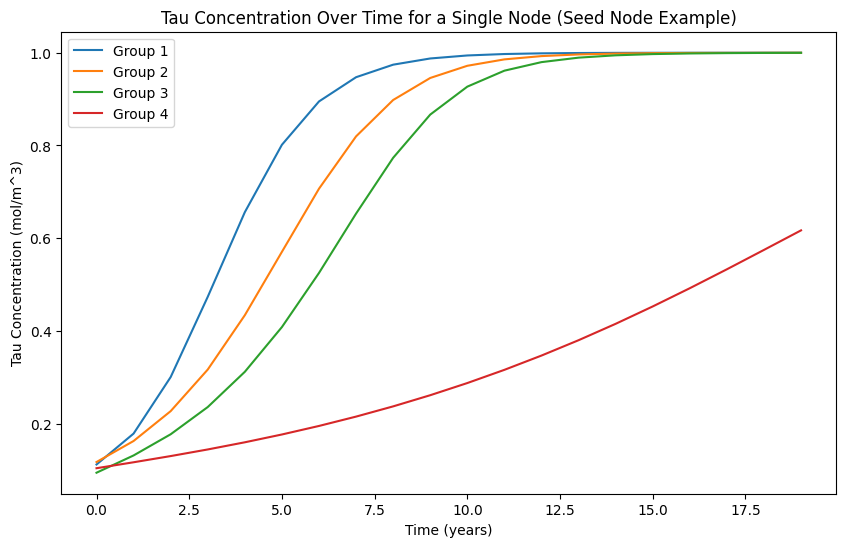

<ipython-input-8-b4fe28c4a893>:100: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


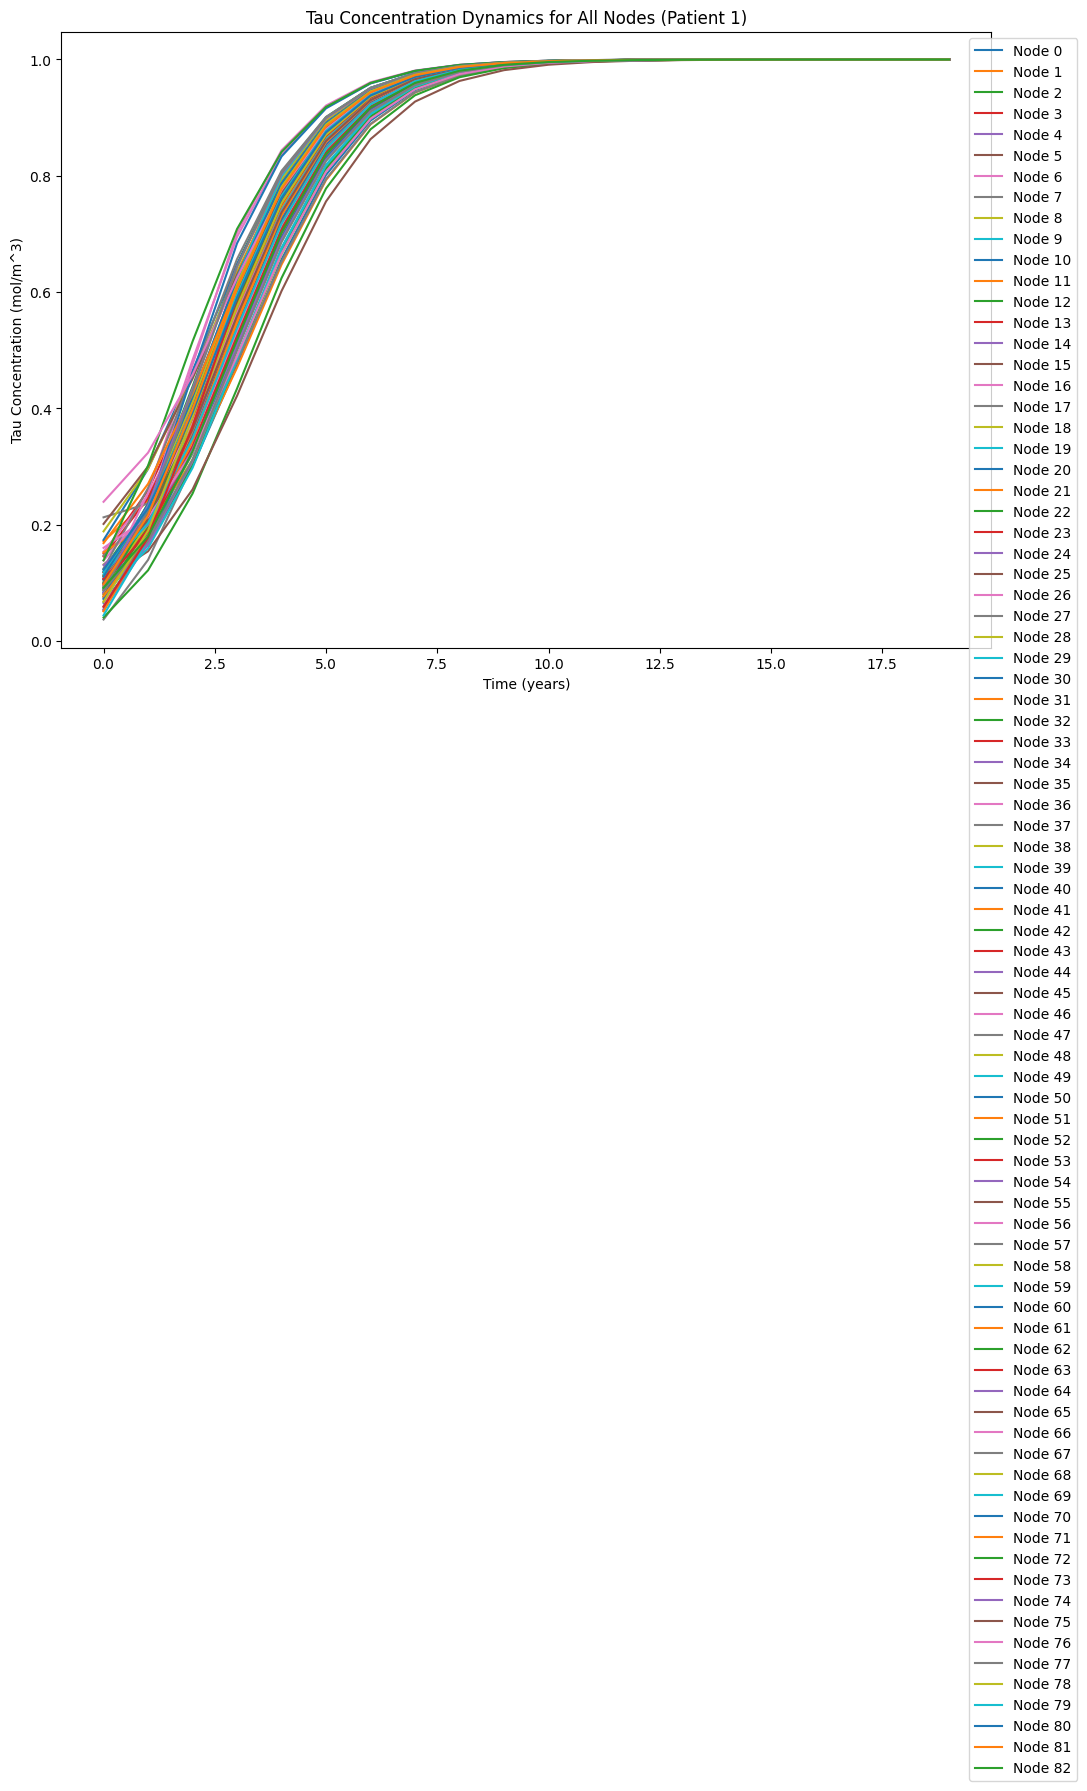

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.8949415818084D+01   r2 =  0.7628878764319D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.8949415818084D+01   r2 =  0.7628878764319D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.8949415818084D+01   r2 =  0.7628878764319D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.8949415818084D+01   r2 =  0.7628878764319D-15
 lsoda--  warning..internal t (=r1) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constants
NUM_SUBJECTS = 76
NUM_GROUPS = 4
NUM_NODES = 83
GROUP_SIZE = NUM_SUBJECTS // NUM_GROUPS
TIME_STEP = 1
TIME_POINTS = 20

# Reaction terms with saturation
def reaction_term_1(c, max_tau=1):
    return c * (1 - c)

def reaction_term_2(c, max_tau=0.6495190):
    return max_tau * c * (1 - (c)**2)

def reaction_term_3(c, max_tau=0.529133684):
    return max_tau * c * (1 - (c)**3)

def reaction_term_4(c, max_tau=1):
    return 1.059016994 * c * (1 - c) * np.exp(c - 1.381966011)

reaction_terms = [reaction_term_1, reaction_term_2, reaction_term_3, reaction_term_4]

# Sample from given distributions for parameters
def sample_parameters(num_subjects, num_nodes):
    kappa = np.random.normal(1, 0.52, num_subjects)
    alpha_i = np.random.normal(0.6, 0.12, num_subjects)
    alpha_ij = np.array([np.random.normal(ai, 0.22, num_nodes) for ai in alpha_i])
    return kappa, alpha_i, alpha_ij

# Generate initial tau concentrations using log-normal distribution
real_data_mean = 0.1  # Mean tau concentration in mol/m^3
real_data_std = 0.05  # Standard deviation
def generate_initial_conditions_log_normal(num_subjects, num_nodes):
    return np.random.lognormal(mean=np.log(real_data_mean), sigma=np.log(1 + real_data_std / real_data_mean), size=(num_subjects, num_nodes))

# Generate a realistic connectivity matrix (Laplacian)
def generate_connectivity_matrix(num_nodes):
    A = np.random.rand(num_nodes, num_nodes)
    A = (A + A.T) / 2  # Make symmetric
    np.fill_diagonal(A, 0)  # No self-loops
    D = np.diag(A.sum(axis=1))  # Degree matrix
    L = D - A  # Graph Laplacian
    max_eigenvalue = np.max(np.linalg.eigvalsh(L))
    return L / max_eigenvalue

# Simulate tau concentration dynamics over time using odeint
L = generate_connectivity_matrix(NUM_NODES)
kappa, alpha_i, alpha_ij = sample_parameters(NUM_SUBJECTS, NUM_NODES)

def simulate_tau_dynamics(initial_conditions, kappa, alpha_ij, reaction_terms, L, time_step, time_points):
    num_subjects, num_nodes = initial_conditions.shape
    t = np.linspace(0, time_points * time_step, time_points)
    c = np.zeros((num_subjects, num_nodes, len(t)))

    def tau_dynamics(c_flat, t, subj, group):
        c = c_flat.reshape((num_nodes,))
        f = reaction_terms[group]
        dc_dt = np.zeros(num_nodes)
        for i in range(num_nodes):
            diffusion = -kappa[subj] * np.dot(L[i, :], c)
            reaction = alpha_ij[subj, i] * f(c[i])
            dc_dt[i] = diffusion + reaction
        return dc_dt

    for subj in range(num_subjects):
        group = subj // GROUP_SIZE
        c_flat_initial = initial_conditions[subj, :].flatten()
        c[subj, :, :] = odeint(tau_dynamics, c_flat_initial, t, args=(subj, group)).T

    return c

# Main workflow
initial_conditions = generate_initial_conditions_log_normal(NUM_SUBJECTS, NUM_NODES)
tau_concentration = simulate_tau_dynamics(initial_conditions, kappa, alpha_ij, reaction_terms, L, TIME_STEP, TIME_POINTS)

# Plot example dynamics for a single node
plt.figure(figsize=(10, 6))
for group in range(NUM_GROUPS):
    plt.plot(np.arange(0, TIME_POINTS * TIME_STEP, TIME_STEP), tau_concentration[group * GROUP_SIZE, 0, :], label=f"Group {group + 1}")
plt.xlabel("Time (years)")
plt.ylabel("Tau Concentration (mol/m^3)")
plt.title("Tau Concentration Over Time for a Single Node (Seed Node Example)")
plt.legend()
plt.show()

# Optionally, plot tau dynamics for all nodes of a single patient
single_patient_idx = 0
plt.figure(figsize=(12, 8))
for i in range(NUM_NODES):
    plt.plot(np.arange(0, TIME_POINTS * TIME_STEP, TIME_STEP), tau_concentration[single_patient_idx, i, :], label=f"Node {i}")
plt.xlabel("Time (years)")
plt.ylabel("Tau Concentration (mol/m^3)")
plt.title(f"Tau Concentration Dynamics for All Nodes (Patient {single_patient_idx + 1})")
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.show()


In [9]:
# t = torch.linspace(0, 20, 20).reshape(-1, 1) #matrix for 10 years (1,10) e.g[1,2,3,4,5,6,7,....,10]
# tau_conc = np.zeros((NUM_SUBJECTS, NUM_NODES, TIME_POINTS))
# tau_conc_tensor = np.zeros((NUM_SUBJECTS, NUM_NODES, TIME_POINTS))
# # Reaction terms with saturation
# def reaction_term_1(c, max_tau=1):
#     return c * (1 - c)

# def reaction_term_2(c, max_tau=0.6495190):
#     return max_tau*c * (1 - (c)**2)

# def reaction_term_3(c, max_tau=0.529133684):
#     return max_tau*c * (1 - (c)**3)

# def reaction_term_4(c, max_tau=1):
#     return 1.059016994*c * (1 - c) * np.exp(c - 1.381966011)

# reaction_terms = [reaction_term_1, reaction_term_2, reaction_term_3, reaction_term_4]
# for subj in (range(NUM_SUBJECTS)):
#   for i in range(NUM_NODES):
#     sum = 0
#     for j in range(NUM_NODES):
#       sum += L[i,j]*initial_conditions[subj,j]
#     diffusion_coeff = -kappa[subj] * sum
#     alpha = alpha_ij[subj,i]
#     def generate_data(t, reaction_term, diffusion_coeff, alpha):
#         def tau_ode(c, t):
#             return diffusion_coeff + alpha * reaction_term(c)
#         c_init = initial_conditions[subj,j] #initial conc for node 1 of subject 1
#         c = odeint(tau_ode, c_init, t)
#         return c
#     group = subj // GROUP_SIZE
#     f = reaction_terms[group]
#     tau_conc[subj,i,:] = generate_data(t.detach().numpy().flatten(), f, diffusion_coeff, alpha).flatten()
#     tau_conc_tensor[subj,i,:] = torch.tensor(tau_conc[subj,i,:], dtype=torch.float32)

# plt.figure(figsize=(10, 6))
# for group in range(NUM_GROUPS):
#     plt.plot(np.arange(0, 20, TIME_STEP), tau_conc[group * GROUP_SIZE, 0, :], label=f"Group {group + 1}")
# plt.xlabel("Time (years)")
# plt.ylabel("Tau Concentration (mol/m^3)")
# plt.title("Tau Concentration Over Time for a Single Node (Seed Node Example)")
# plt.legend()
# plt.show()

# # Optionally, plot tau dynamics for all nodes of a single patient
# # single_patient_idx = 0  # You can select any patient here
# # plt.figure(figsize=(12, 8))
# # for i in range(NUM_NODES):
# #     plt.plot(np.arange(0, 20, TIME_STEP), tau_conc[70, i, :], label=f"Node {i}")
# # plt.xlabel("Time (years)")
# # plt.ylabel("Tau Concentration (mol/m^3)")
# # plt.title(f"Tau Concentration Dynamics for All Nodes (Patient {1})")
# # plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1))
# # plt.tight_layout()
# # plt.show()
# # Plot tau concentration dynamics for all nodes of a single patient
# # Import necessary libraries
# import matplotlib.pyplot as plt
# import numpy as np

# # Plot tau concentration dynamics for all nodes of a single patient
# single_patient_idx = 0  # Select the patient index you want to visualize

# # Increase figure size for better visualization and to fit all legends
# plt.figure(figsize=(16, 30))

# # Plot tau concentration dynamics for each node
# for i in range(NUM_NODES):
#     plt.plot(
#         np.arange(0, 20, TIME_STEP),
#         tau_conc[single_patient_idx, i, :],
#         label=f"Node {i}",
#         linewidth=1
#     )

# # Add labels and title
# plt.xlabel("Time (years)", fontsize=14)
# plt.ylabel("Tau Concentration (mol/m^3)", fontsize=14)
# plt.title(f"Tau Concentration Dynamics for All Nodes (Patient {single_patient_idx + 1})", fontsize=16)

# # Place legend outside the plot to avoid overcrowding
# plt.legend(
#     loc="center left",
#     bbox_to_anchor=(1, 0.5),
#     title="Nodes",
#     fontsize=10,
#     title_fontsize=12,
#     ncol=1
# )

# # Adjust layout to fit the legend and graph properly
# plt.tight_layout()

# # Show the plot
# plt.show()


-0.0035051391888420323
Training with Adam...
Epoch 0, loss: 0.4348822832107544
Epoch 1000, loss: 0.0016564562683925033
Epoch 2000, loss: 0.0007669712067581713
Epoch 3000, loss: 0.0001175857032649219
Epoch 4000, loss: 3.808650217251852e-05
Epoch 5000, loss: 1.3087284060020465e-05
Epoch 6000, loss: 4.125321993342368e-06
Epoch 7000, loss: 1.679837737356138e-06
Epoch 8000, loss: 8.458698630420258e-07
Epoch 9000, loss: 4.94883920509892e-07
Epoch 10000, loss: 4.3929418325205916e-07
Epoch 11000, loss: 3.3611564731472754e-07
Epoch 12000, loss: 3.024861996436812e-07
Epoch 13000, loss: 2.7316343675920507e-07
Epoch 14000, loss: 2.490905330887472e-07
Epoch 15000, loss: 2.2780295694246888e-07
Epoch 16000, loss: 4.4490076334113837e-07
Epoch 17000, loss: 1.9316729549245792e-07
Epoch 18000, loss: 1.7421811548956612e-07
Epoch 19000, loss: 1.594195282450528e-07
Training with L-BFGS...
L-BFGS Iteration 0, loss: 1.456881477679417e-07
L-BFGS Iteration 1000, loss: 1.456881477679417e-07
L-BFGS Iteration 2000

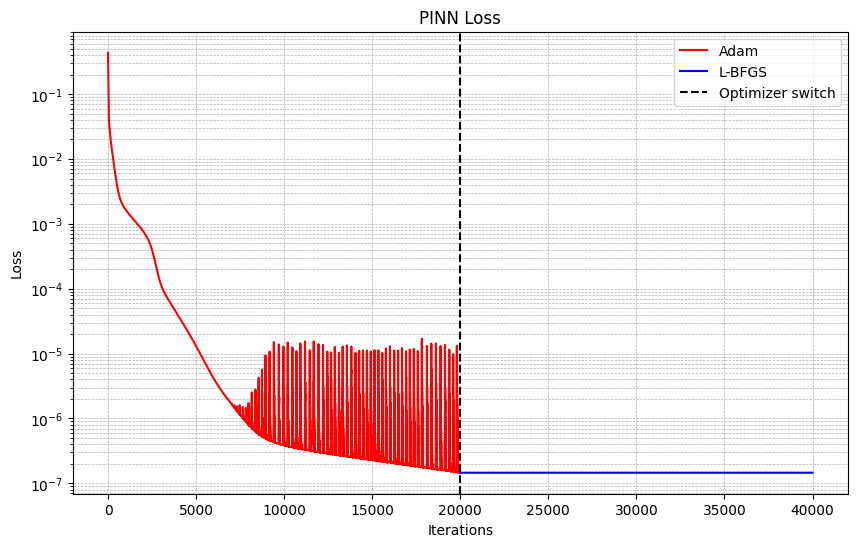

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 5.500e+04
Progress: 422 / 1240 total iterations (34.032%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.655e-02  1.594e+01  y = 0.088765
5           8.033e-03  1.807e-01  y = (x₀ + -1.098) * -0.31449
7           6.662e-05  2.396e+00  y = ((x₀ * -1.4858) + 1.4796) * x₀
9           1.010e-05  9.432e-01  y = (x₀ * ((x₀ * -1.5962) + 1.6275)) + -0.039174
11          1.010e-05  2.295e-06  y = (x₀ * 1.6275) + (((x₀ * x₀) * -1.5962) + -0.039173)
13          2.908e-06  6.225e-01  y = x₀ * (((x₀ * x₀) * ((x₀ * 0.91207) + -2.0865)) + 1.167...
                                      5)
15          2.741e-06  2.971e-02  y = ((x₀ * (((x₀ * x₀) + (x₀ * -2.2669)) + 0.11279)) + 1.1...
                                      472) * x₀
──────────────────────────────

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.655e-02  1.594e+01  y = 0.088765
5           8.033e-03  1.807e-01  y = (x₀ + -1.098) * -0.31449
7           6.662e-05  2.396e+00  y = x₀ * ((x₀ * -1.4859) + 1.4796)
9           1.010e-05  9.432e-01  y = (x₀ * ((x₀ * -1.5962) + 1.6275)) + -0.039174
11          5.668e-06  2.889e-01  y = x₀ * (((x₀ * (x₀ + -2.192)) * x₀) + 1.1857)
13          2.741e-06  3.633e-01  y = x₀ * ((x₀ * (((x₀ + -2.267) * x₀) + 0.11304)) + 1.1472...
                                      )
15          2.741e-06  7.480e-06  y = ((x₀ * ((x₀ * x₀) + ((x₀ * -2.267) + 0.11304))) + 1.14...
                                      72) * x₀
17          2.741e-06  4.292e-06  y = ((x₀ * x₀) * ((x₀ * x₀) + ((x₀ * -2.2668) + 0.11275)))...
                                       + (x₀ * 1.1473)
19          2.737e-06  5.742e-04  y = (x₀ * (((x₀ * ((-2.2699 * x₀) + 0.10313)) + (

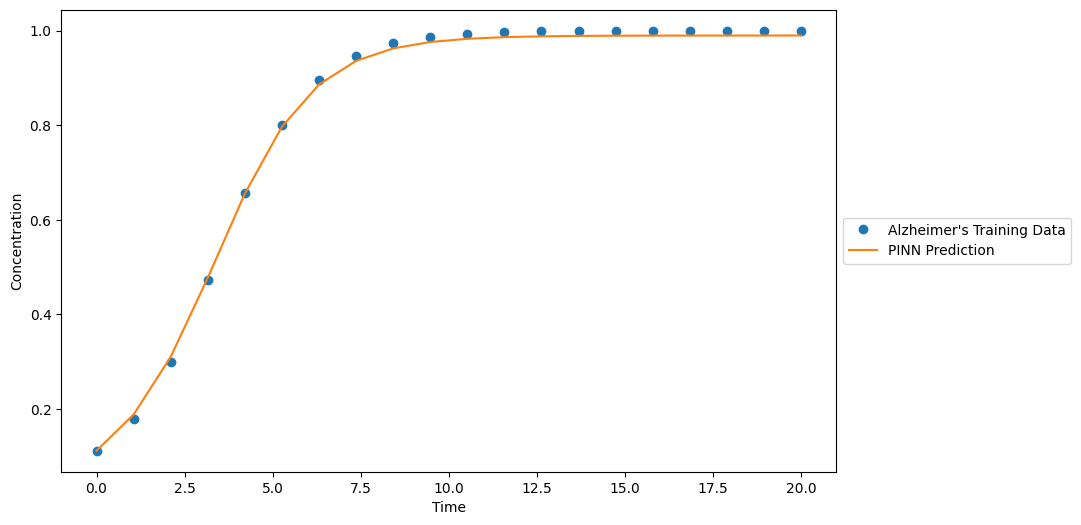

  - outputs/20241224_223009_GHEW0I/hall_of_fame.csv


In [10]:
from sympy.utilities.lambdify import lambdify
def save_gif(outfile, files, fps=5, loop=0):
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=int(1000/fps), loop=loop)
    for file in files:  # Clean up intermediate files
        os.remove(file)


# Alzheimer's and Control Reaction Terms

# def alzheimers_reaction_terms(c):
#     return 0.23 * c ** 3 - 1.34 * c ** 2 + 1.11 * c

# def control_reaction_term(c):
#     return -c ** 3 + 0.62 * c ** 2 + 0.39 * c

# Generate synthetic data based on reaction term and diffusion coefficient


def generate_data(t, reaction_term, diffusion_coeff, alpha):
    def tau_ode(c, t):
        return diffusion_coeff + alpha * reaction_term(c)
    c_init = initial_conditions[0,0] #initial conc for node 1 of subject 1
    c = odeint(tau_ode, c_init, t)
    return c

# Define time points and diffusion coefficient
t = torch.linspace(0, 20, 20).reshape(-1, 1) #matrix for 10 years (1,10) e.g[1,2,3,4,5,6,7,....,10]
sum = 0
for i in range(NUM_NODES):
  sum += L[0,i]*initial_conditions[0,i]
diffusion_coeff = -kappa[0]*sum
print(diffusion_coeff)
# 1 subject ,1 node
#76 subject ,83 node

alpha = alpha_ij[0,0]
# Generate Alzheimer's and Control synthetic data

alzheimers_data = tau_concentration[0][0].reshape(-1,1)
# Convert each data into a torch tensor

c_alzheimers = torch.tensor(alzheimers_data, dtype=torch.float32) #return matrix (1,t) c for every year during 10 years
# print("c_alzheimers")
# print(c_alzheimers)

# Define the PINN model
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        # Network to approximate concentration c
        self.net_c = nn.Sequential(
            nn.Linear(1, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )
        # Network to approximate the reaction term f(c)
        self.net_f = nn.Sequential(
            nn.Linear(1, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )

    def forward(self, t):
        c = self.net_c(t)
        f = self.net_f(c)
        return c, f

# PDE loss function for the PINN
def pde_loss(pinn, t, c, diffusion_coeff, alpha):
    t.requires_grad = True
    c_pred, f_pred = pinn(t)
    # Data loss (mean squared error)
    data_loss = nn.MSELoss()(c_pred, c)

    # PDE loss
    c_t = torch.autograd.grad(c_pred.sum(), t, create_graph=True)[0]
    diffusion_term =  - diffusion_coeff * c_pred
    pde_residual = c_t - diffusion_term -  alpha * f_pred
    pde_loss = (pde_residual ** 2).mean()

    return data_loss + pde_loss

# Function to train PINN using Adam and L-BFGS
def train_pinn(pinn, t, c, diffusion_coeff, alpha, adam_epochs=20000, lbfgs_epochs=20000, lr=0.0001):

    files = []

    adam_loss_history = []
    BFGS_loss_history = []

    # Adam optimizer for initial training
    optimizer_adam = torch.optim.Adam(pinn.parameters(), lr=lr)
    print("Training with Adam...")
    for epoch in range(adam_epochs):
        loss = pde_loss(pinn, t, c, diffusion_coeff, alpha)
        adam_loss_history.append(loss.item())
        optimizer_adam.zero_grad()
        loss.backward()
        optimizer_adam.step()

        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, loss: {loss.item()}')
            c_pred, _ = pinn(t)
            plt.figure(figsize=(10, 6))
            plt.plot(t.detach().numpy(), c.detach().numpy(), 'o', label="True Data")
            plt.plot(t.detach().numpy(), c_pred.detach().numpy(), '-', label="PINN Prediction")
            plt.xlabel("Time")
            plt.ylabel("Concentration")
            plt.legend()
            file = f"pinn_adam_epoch_{epoch}.png"
            plt.savefig(file)
            files.append(file)
            plt.close()

    # L-BFGS optimizer for fine-tuning
    optimizer_lbfgs = LBFGS(pinn.parameters(), lr=lr, max_iter=lbfgs_epochs)
    print("Training with L-BFGS...")

    def closure():
        optimizer_lbfgs.zero_grad()
        loss = pde_loss(pinn, t, c, diffusion_coeff, alpha)
        loss.backward()
        return loss

    for epoch in range(lbfgs_epochs):
        loss = optimizer_lbfgs.step(closure)
        BFGS_loss_history.append(loss.item())

        if epoch % 1000 == 0:
            print(f'L-BFGS Iteration {epoch}, loss: {loss.item()}')
            c_pred, _ = pinn(t)
            plt.figure(figsize=(10, 6))
            plt.plot(t.detach().numpy(), c.detach().numpy(), 'o', label="True Data")
            plt.plot(t.detach().numpy(), c_pred.detach().numpy(), '-', label="PINN Prediction")
            plt.xlabel("Time")
            plt.ylabel("Concentration")
            plt.legend()
            file = f"pinn_lbfgs_epoch_{epoch}.png"
            plt.savefig(file)
            files.append(file)
            plt.close()

    save_gif("pinn_training.gif", files, fps=3, loop=0)
    # Plotting the loss history
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(adam_loss_history)), adam_loss_history, label='Adam', color='red')
    plt.plot(np.arange(len(adam_loss_history), len(adam_loss_history) + len(BFGS_loss_history)),
             BFGS_loss_history, label='L-BFGS', color='blue')
    plt.yscale('log')
    plt.axvline(len(adam_loss_history), color='black', linestyle='--', label='Optimizer switch')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('PINN Loss')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    loss_plot_file = "pinn_loss_plot.png"
    plt.savefig(loss_plot_file)
    plt.show()

# Initialize and train PINN for Alzheimer's data
pinn_alzheimer = PINN()
# print("pinn_alzheimer")
# print(pinn_alzheimer.net_c(t.reshape(-1, 1)))
train_pinn(pinn_alzheimer, t, c_alzheimers, diffusion_coeff, alpha)

# Perform symbolic regression on f_pred for each group
def symbolic_regression(pinn):
    c_vals = pinn.net_c(t.reshape(-1,1)).detach().numpy()
    f_vals = pinn.net_f(pinn.net_c(t.reshape(-1,1))).detach().numpy()
    symbolic_regressor = PySRRegressor(
        niterations=40,
        binary_operators=["+", "*"],
    )
    symbolic_regressor.fit(c_vals, f_vals)
    return symbolic_regressor

symbolic_regressor_alz = symbolic_regression(pinn_alzheimer)
best_eq_sympy_alz = symbolic_regressor_alz.sympy()
print("best equ")
print(best_eq_sympy_alz)

# Convert the symbolic regression result into a Python function
def alzheimers_reaction_term(c):

    reaction_func = lambdify(sympy.symbols('x0'), best_eq_sympy_alz, "numpy")
    # print("reaction_func(c)")
    # print(reaction_func(c))
    return reaction_func(c)

# Generate synthetic data using the discovered reaction term

alzheimers_pred = generate_data(t.detach().numpy().flatten(), alzheimers_reaction_term, diffusion_coeff, alpha)

# Convert each data into a torch tensor

c_alzheimers_pred = torch.tensor(alzheimers_pred, dtype=torch.float32)
# print("c_alzheimers_pred")
# print(c_alzheimers_pred)



# Plot the synthetic data for both groups
plt.figure(figsize=(10,6))
plt.plot(t.detach().numpy(), c_alzheimers.detach().numpy(), 'o', label="Alzheimer's Training Data")
plt.plot(t.detach().numpy(), c_alzheimers_pred.detach().numpy(), label="PINN Prediction")# new
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()